### DataFrame
- pandas에서 제공해주는 자료구조
- 행과 열을 가지는 표와 같은 형태 (2차원)

In [1]:
import pandas as pd

In [2]:
population = pd.DataFrame({'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636]
        })

population

,2020,2010
0,9668465,10312545
1,3391946,3567910
2,2942828,2758296
3,1450062,1454636


In [3]:
data=[[9668465,3391946,2942828,1450062],
         [10312545,3567910,2758296,1454636]]
index=['2020','2010']
col = ['서울','부산','인천','광주']
df = pd.DataFrame(data,index = index, columns = col)
df = df.T
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


### DataFrame 구조 파악하기
- values : 값, 데이터 확인하기
- index : 인덱스 확인하기
- columns : 컬럼 확인하기

In [4]:
# DataFrame 값만 확인해보기
df.values

array([[ 9668465, 10312545],
       [ 3391946,  3567910],
       [ 2942828,  2758296],
       [ 1450062,  1454636]], dtype=int64)

In [5]:
# DataFrame 인덱스 확인하기
df.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [6]:
# DataFrame 컬럼 확인하기
df.columns

Index(['2020', '2010'], dtype='object')

### DataFrame 인덱싱, 슬라이싱
- 열 인뎅싱, 행 슬라이싱

In [7]:
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [8]:
# 인덱싱 (열 인덱싱) -> 컬럼 이름으로 
df['2020']
# 결괏값은 Series로 출력이 된다 ~ 1차원

서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 2020, dtype: int64

In [9]:
# DataFrame형태로 출력하고 싶다면?
df[['2020']]

,2020
서울,9668465
부산,3391946
인천,2942828
광주,1450062


In [10]:
df[['2020','2010']]

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [11]:
# DataFrame에서 인덱싱은 열 인덱싱만 가능하다!!!
# df['서울'] error

- 슬라이싱

In [12]:
data3 = {'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636],
         '2005':[9762546,3512547,2517680,1456016]
        }
df3 = pd.DataFrame(data3,index = ['서울','부산','인천','광주'])
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [13]:
# 행 슬라이싱이 되었다.
df3[0:2]

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547


In [14]:
# 인덱스 이름으로도 슬라이싱 가능
df3['서울':'부산']

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547


In [15]:
df3.loc['부산':'인천','2020':'2010']
# 우리가 넘파이에서 사용했던 방식으로는 사용이 불가능하다

,2020,2010
부산,3391946,3567910
인천,2942828,2758296


#### DataFrame 슬라이싱 -> 인덱서 활용

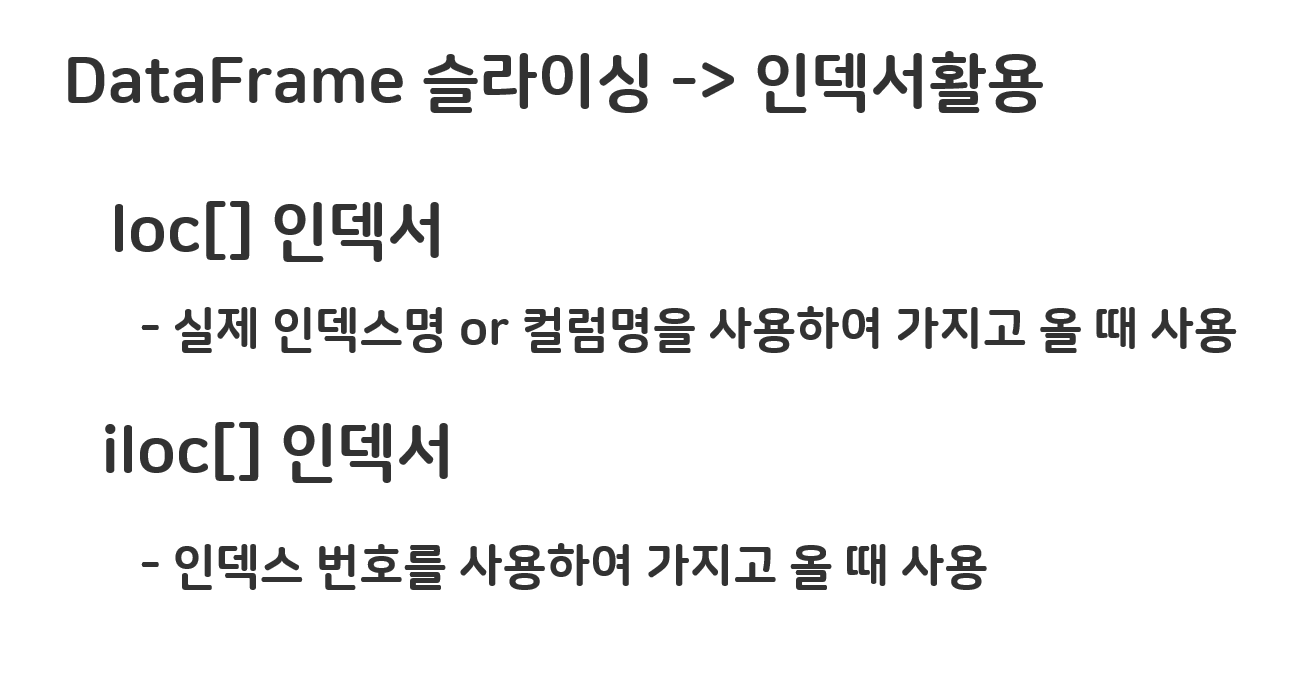

In [16]:
# DataFrame명.loc[행,열]
# loc는 컬럼, 인덱스 명!!!!
df3.loc['부산':'인천','2020':'2010']

,2020,2010
부산,3391946,3567910
인천,2942828,2758296


In [17]:
df3.iloc[1:3,0:2]

,2020,2010
부산,3391946,3567910
인천,2942828,2758296


In [18]:
# 인덱서를 활용하면 행 인덱싱이 가능하다!!
df3.loc['부산':'부산',:]

,2020,2010,2005
부산,3391946,3567910,3512547


- 열 인덱싱 방법
    - df.[인덱스이름]
- 행 인덱싱 방법
    - df.loc[인덱스이름]

### boolean 인덱싱

In [19]:
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [20]:
df3[['2010']][df['2010']>=2600000]

,2010
서울,10312545
부산,3567910
인천,2758296


In [21]:
df3.loc['서울':'부산']

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547


### DataFrame 추가, 수정, 삭제
   - 행 데이터 추가

In [22]:
# 새로운 컬럼 추가하고 싶다면
# 원래 존재하지 않는 컬렁을 인덱싱해서 값을 대입
# 추가할 df이름[새로운컬럼명]=데이터
df['2005'] = [9762546,3512547,2517680,1456016]
df

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [23]:
# 행 데이터 추가
# 2020~2005: 1240000, 1230000, 1200000
df.loc['수원'] = [1240000, 1230000, 1200000]
df

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016
수원,1240000,1230000,1200000


In [24]:
# 열 데이터 수정
df['2010'] = [1,2,3,4,5]
df

ValueError: Length of values (4) does not match length of index (5)

- 수정

In [25]:
# 행 데이터 수정
df.loc['수원'] = 0
df

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016
수원,0,0,0


- 삭제

In [26]:
# DataFrame '부산' 행데이터 삭제
# drop 사용 결과를 임시로 출력
df.drop('부산')


,2020,2010,2005
서울,9668465,10312545,9762546
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016
수원,0,0,0


In [31]:
# 삭제 시 기본 행데이터를 축으로 삼음
# 열 데이터 삭제 시 axis
# 툴팁 사용 방법 shift + tab
df.drop('2010' , axis=1)

,2020,2005
서울,9668465,9762546
부산,3391946,3512547
인천,2942828,2517680
광주,1450062,1456016
수원,0,0


In [32]:
# 삭제와 동시에 바로 저장해주는 속성
df.drop('2010',axis=1,inplace=True)
df

,2020,2005
서울,9668465,9762546
부산,3391946,3512547
인천,2942828,2517680
광주,1450062,1456016
수원,0,0


- 컬럼명, 인덱스명 수정

In [33]:
df

,2020,2005
서울,9668465,9762546
부산,3391946,3512547
인천,2942828,2517680
광주,1450062,1456016
수원,0,0


In [34]:
#df.rename(컬럼or인덱스={바꿀이름:바뀔이름})
df.rename(columns={'2005':'2010'},inplace=True)
df

,2020,2010
서울,9668465,9762546
부산,3391946,3512547
인천,2942828,2517680
광주,1450062,1456016
수원,0,0


In [36]:
df.rename(index={'수원':'인천'},inplace=True)
df

,2020,2010
서울,9668465,9762546
부산,3391946,3512547
인천,2942828,2517680
광주,1450062,1456016
인천,0,0


### DataFrame 실습
- population.csv

In [42]:
population = pd.read_csv("population.csv", encoding='utf-8', index_col='도시')
population
# 인코딩
# utf-8
# euc-kr

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [43]:
# 정렬하기
# 인덱스 값을 기준으로 정렬하기
population.sort_index()
# 사전순으로 오름차순 정렬

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495


In [52]:
# 값을 기준으로 정렬
population['2010'].sort_values(ascending=False)
# 오름차순 정렬, 결측치는 마지막으로.

도시
서울    10312545.0
대구     2431774.0
광주     1454636.0
부산           NaN
인천           NaN
Name: 2010, dtype: float64

In [53]:
# 데이터 기준으로 정렬 -> 전체 데이터에서 출력
# 어떤 데이터를 기준으로 정렬할 건지 정의
population.sort_values(by = '2010')

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [55]:
# 지역을 기준으로 내림차순 정렬 / 동일한 값이 있어서 또 정렬이 하고 싶다면
# 리스트로 묶어준 다음 정렬
population.sort_values(by=['지역'], ascending = False)

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495
부산,경상권,3391946,NaN,NaN,3628293
대구,경상권,2418436,2466052.0,2431774.0,2456016


- count()
- 각 행, 열별로 데이터의 개수를 세어주는 함수
- 행 데이터가, 열 데이터가 몇 개 존재하는가 count

In [57]:
# 행 데이터의 개수를 세줌
population.count()

도시
서울    5
부산    3
인천    4
광주    5
대구    5
dtype: int64

In [58]:
population.count(axis=1)

도시
서울    5
부산    3
인천    4
광주    5
대구    5
dtype: int64

- fillna()
- 결측치(Nan)를 원하는 값으로 채워주는 함수

In [59]:
# 결측치와의 연산은 결측치


In [65]:
# 결측치가 있는 곳을 0으로 변경
# df명.fillna(value값)
population.fillna(0, inplace=True)
population['2015'].astype("int64")


도시
서울    10022181
부산           0
인천     2925815
광주     1474636
대구     2466052
Name: 2015, dtype: int64

In [66]:
# 내가 원하는 컬럼의 데이터 타입 변경
population.astype({'2015':'int64'})

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181,10312545.0,10167344
부산,경상권,3391946,0,0.0,3628293
인천,수도권,2942828,2925815,0.0,2600495
광주,전라권,1450062,1474636,1454636.0,1401745
대구,경상권,2418436,2466052,2431774.0,2456016


#### DataFrame 실습
- score.csv

In [95]:
# 무엇으로 인코딩 되어있는지 확인해주는 코드

import chardet
import pandas as pd
filename = "score.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline()) 
    print(result['encoding'])

EUC-KR


In [96]:
score = pd.read_csv("score.csv",encoding='euc-kr', index_col="과목")
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


- 학급별로 점수 합계 구하기

In [97]:
sum_score = score.sum()

In [98]:
sum_score.sort_values(ascending=False)

2반    388
3반    295
1반    271
4반    243
dtype: int64

In [99]:
sum_score_sub=score.sum(axis=1)
sum_score_sub.sort_values(ascending=False)

과목
크롤링    298
DB     282
자바     253
파이썬    201
Web    163
dtype: int64

In [100]:
score['합계']=score.sum(axis=1).astype("int64")

In [101]:
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [106]:
score['평균']=score.loc[:,'1반':'4반'].mean(axis=1)

In [107]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50.25
DB,76,92,45,69,282,70.50
자바,47,92,45,69,253,63.25
크롤링,92,81,85,40,298,74.50
Web,11,79,47,26,163,40.75
